In [1]:
import torch
import numpy as np
import pandas as pd
import random 
from Evaluator import ModelEvaluator
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import itertools
import joblib as jb

## cargando los datos adversarios 2021

In [2]:
advData=pd.read_csv('datasets/Adversarial_data.csv')
print(advData.head(3))


   -97.0  -47.0  -6.0  -27.0  73.0  13.0  -59.0  93.0  -36.0   5.0
0   -1.0  -65.0 -26.0   51.0  -9.0  23.0   63.0 -54.0   19.0  15.0
1   -1.0   63.0 -93.0   43.0 -12.0  76.0   -4.0 -53.0   62.0  50.0
2   53.0  -25.0  42.0   87.0   1.0   1.0   18.0  -6.0   83.0  11.0


In [3]:
advData.shape

(499, 10)

In [4]:
advData.columns=['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets','source_app_bytes','remote_app_bytes','dns_query_times']

Agregando los headers, a partir del conocimiento de los datos originales, teniendo en cuenta que el entrenamiento no es un proceso que realiza el atacante.

In [5]:
advData.head(3)

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
0,-1.0,-65.0,-26.0,51.0,-9.0,23.0,63.0,-54.0,19.0,15.0
1,-1.0,63.0,-93.0,43.0,-12.0,76.0,-4.0,-53.0,62.0,50.0
2,53.0,-25.0,42.0,87.0,1.0,1.0,18.0,-6.0,83.0,11.0


In [6]:
advData['type']='malicious'

In [7]:
advData.head(3)

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,type
0,-1.0,-65.0,-26.0,51.0,-9.0,23.0,63.0,-54.0,19.0,15.0,malicious
1,-1.0,63.0,-93.0,43.0,-12.0,76.0,-4.0,-53.0,62.0,50.0,malicious
2,53.0,-25.0,42.0,87.0,1.0,1.0,18.0,-6.0,83.0,11.0,malicious


## Cargando los datos adversarios 2018

In [8]:
dataAdversarial2018=pd.read_csv("datasets/Colcom2018AdversarialDataTrain.csv",header=0,sep=';')
print(dataAdversarial2018.head(3))
print(dataAdversarial2018.shape)

   tcp_packets  dist_port_tcp  external_ips  vulume_bytes  udp_packets  \
0     5.927622            0.0     -0.666667     39.884274          0.0   
1    22.138217            0.0     -0.666667     -0.312383          0.0   
2   104.151100            0.0     -0.666667    107.834553          0.0   

   source_app_packets  remote_app_packets   source_app_bytes  \
0          103.199390            0.700097         437.493903   
1           31.467176           -0.258824         625.873298   
2           35.351266           -0.270588         326.570370   

   remote_app_bytes  dns_query_times       type  
0          1.994524            -0.25  malicious  
1         24.786021            -0.25  malicious  
2         60.857192            -0.50  malicious  
(500, 11)


## Cargando los datos originales

In [9]:
data=pd.read_csv("datasets/Colcom2018CleanedScaled.csv",header=0,sep=';')
print(data.head(3))
print(data.shape)

   tcp_packets  dist_port_tcp  external_ips  vulume_bytes  udp_packets  \
0     0.127907            6.0      0.333333      0.036782          0.0   
1     1.069767            0.0      2.333333      1.786894          0.0   
2     1.988372            0.0      1.333333      1.843764          0.0   

   source_app_packets  remote_app_packets   source_app_bytes  \
0            0.100000            0.105882           0.041652   
1            1.088889            0.976471           0.897275   
2            1.944444            2.235294           6.465984   

   remote_app_bytes  dns_query_times    type  
0          0.029865              0.0  benign  
1          1.787684              2.0  benign  
2          1.831939              1.5  benign  
(7832, 11)


# Split for training and testing

## Primero los datos originales

In [10]:
golden_X_train, golden_X_test, golden_Y_train, golden_Y_test = train_test_split(data.iloc[:,0:10], data['type'], test_size=0.25, random_state=50)

## Segundo los datos del 2018

In [11]:
oldAdv_X_train, oldAdv_X_test, oldAdv_Y_train, oldAdv_Y_test = train_test_split(dataAdversarial2018.iloc[:,0:10], dataAdversarial2018['type'], test_size=0.25, random_state=50)

## Ahora los datos adversarios

In [12]:
adv_X_train, adv_X_test, adv_Y_train, adv_Y_test = train_test_split(advData.iloc[:,0:10], advData['type'], test_size=0.25, random_state=50)
adv_X_train

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
411,27.0,-44.0,-47.0,80.0,-10.0,12.0,47.0,-81.0,27.0,64.0
81,-22.0,-72.0,-44.0,-8.0,-49.0,106.0,-91.0,66.0,34.0,41.0
362,-44.0,-61.0,-41.0,56.0,-57.0,58.0,77.0,-49.0,112.0,37.0
31,87.0,-12.0,-70.0,-18.0,-94.0,0.0,50.0,-24.0,12.0,-3.0
158,-91.0,-38.0,-44.0,-60.0,-125.0,-9.0,-10.0,64.0,-108.0,-4.0
...,...,...,...,...,...,...,...,...,...,...
289,-71.0,-43.0,-23.0,83.0,-115.0,52.0,10.0,68.0,-80.0,26.0
109,-90.0,69.0,-14.0,32.0,-69.0,84.0,55.0,-87.0,53.0,-5.0
395,34.0,-42.0,45.0,-84.0,18.0,-43.0,-24.0,90.0,-35.0,50.0
480,16.0,-82.0,79.0,48.0,-76.0,44.0,35.0,-68.0,78.0,74.0


## Mezclando los datos para obtener un modelo mas robusto

In [13]:
golden_X_train.iloc[0:3,:]

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
2883,0.267442,7.0,0.666667,0.260066,0.0,0.244444,0.247059,0.076528,0.254787,0.25
2926,1.593023,2.0,1.000000,0.988394,0.0,1.511111,1.670588,7.028402,0.963462,0.25
843,1.023256,109.0,0.000000,1.026158,0.0,0.933333,1.035294,0.101653,0.979634,-0.50


In [14]:

golden_X_train=golden_X_train.reset_index(drop=True)
golden_Y_train=golden_Y_train.reset_index(drop=True)
golden_X_train.iloc[0:3,:]

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
0,0.267442,7.0,0.666667,0.260066,0.0,0.244444,0.247059,0.076528,0.254787,0.25
1,1.593023,2.0,1.000000,0.988394,0.0,1.511111,1.670588,7.028402,0.963462,0.25
2,1.023256,109.0,0.000000,1.026158,0.0,0.933333,1.035294,0.101653,0.979634,-0.50


In [15]:
oldAdv_X_train

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
412,88.747502,0.0,0.333333,0.639050,0.0,118.271335,26.449366,641.143092,20.254031,0.00
81,29.176036,0.0,0.666667,0.196143,0.0,83.150697,0.200000,388.915438,16.620728,0.50
363,114.531462,0.0,0.333333,0.245425,0.0,17.565350,0.152941,397.529280,0.233573,0.00
31,10.062445,0.0,0.000000,22.535794,0.0,72.180897,117.482931,83.607507,54.387603,-0.25
158,27.404856,0.0,0.333333,0.028301,0.0,9.867889,54.597104,133.919209,21.196093,0.75
...,...,...,...,...,...,...,...,...,...,...
289,109.989425,0.0,-0.333333,12.383441,0.0,39.057753,45.740853,642.015019,65.126405,0.00
109,19.647984,12.0,0.666667,20.442410,0.0,14.557474,131.676242,175.383755,9.653466,0.25
395,18.731362,0.0,0.000000,0.297831,0.0,79.435401,0.164706,505.148987,40.725064,-0.25
480,119.056317,0.0,0.333333,36.794087,0.0,20.426839,0.129412,150.480702,21.438642,0.00


## Agregando a los datos originales los datos del 2018

In [16]:

golden_X_train=golden_X_train.append(oldAdv_X_train, ignore_index = True)
golden_Y_train=golden_Y_train.append(oldAdv_Y_train, ignore_index = True)
golden_X_train

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
0,0.267442,7.0,0.666667,0.260066,0.0,0.244444,0.247059,0.076528,0.254787,0.25
1,1.593023,2.0,1.000000,0.988394,0.0,1.511111,1.670588,7.028402,0.963462,0.25
2,1.023256,109.0,0.000000,1.026158,0.0,0.933333,1.035294,0.101653,0.979634,-0.50
3,78.837209,0.0,0.000000,37.969199,0.0,75.300000,121.235294,574.853741,36.963549,-0.25
4,0.058140,0.0,0.000000,0.033390,0.0,0.033333,0.058824,0.077742,0.026126,0.00
...,...,...,...,...,...,...,...,...,...,...
6244,109.989425,0.0,-0.333333,12.383441,0.0,39.057753,45.740853,642.015019,65.126405,0.00
6245,19.647984,12.0,0.666667,20.442410,0.0,14.557474,131.676242,175.383755,9.653466,0.25
6246,18.731362,0.0,0.000000,0.297831,0.0,79.435401,0.164706,505.148987,40.725064,-0.25
6247,119.056317,0.0,0.333333,36.794087,0.0,20.426839,0.129412,150.480702,21.438642,0.00


## Agregando a los datos originales los datos adversarios del 2021

In [17]:
#corrige el espacio antes de remote_app_bytes de los datos anteriores.
golden_X_train.rename(columns={' source_app_bytes':'source_app_bytes'}, inplace=True)

In [18]:
golden_X_train=golden_X_train.append(adv_X_train, ignore_index = True)
golden_Y_train=golden_Y_train.append(adv_Y_train, ignore_index = True)
golden_X_train

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
0,0.267442,7.0,0.666667,0.260066,0.0,0.244444,0.247059,0.076528,0.254787,0.25
1,1.593023,2.0,1.000000,0.988394,0.0,1.511111,1.670588,7.028402,0.963462,0.25
2,1.023256,109.0,0.000000,1.026158,0.0,0.933333,1.035294,0.101653,0.979634,-0.50
3,78.837209,0.0,0.000000,37.969199,0.0,75.300000,121.235294,574.853741,36.963549,-0.25
4,0.058140,0.0,0.000000,0.033390,0.0,0.033333,0.058824,0.077742,0.026126,0.00
...,...,...,...,...,...,...,...,...,...,...
6618,-71.000000,-43.0,-23.000000,83.000000,-115.0,52.000000,10.000000,68.000000,-80.000000,26.00
6619,-90.000000,69.0,-14.000000,32.000000,-69.0,84.000000,55.000000,-87.000000,53.000000,-5.00
6620,34.000000,-42.0,45.000000,-84.000000,18.0,-43.000000,-24.000000,90.000000,-35.000000,50.00
6621,16.000000,-82.0,79.000000,48.000000,-76.0,44.000000,35.000000,-68.000000,78.000000,74.00


## Load discriminator

In [19]:
#plot confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [20]:

rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(golden_X_train,golden_Y_train)
pred=rdF.predict(golden_X_test)
cm=confusion_matrix(golden_Y_test, pred)

accuracy = accuracy_score(golden_Y_test,pred)
print(rdF)
print(accuracy)
print(classification_report(golden_Y_test,pred, labels=None))

print(cm)

RandomForestClassifier(max_depth=50, n_estimators=250, random_state=45)
0.9106230847803881
              precision    recall  f1-score   support

      benign       0.91      0.94      0.93      1151
   malicious       0.91      0.87      0.89       807

    accuracy                           0.91      1958
   macro avg       0.91      0.90      0.91      1958
weighted avg       0.91      0.91      0.91      1958

[[1080   71]
 [ 104  703]]


## Secure learning

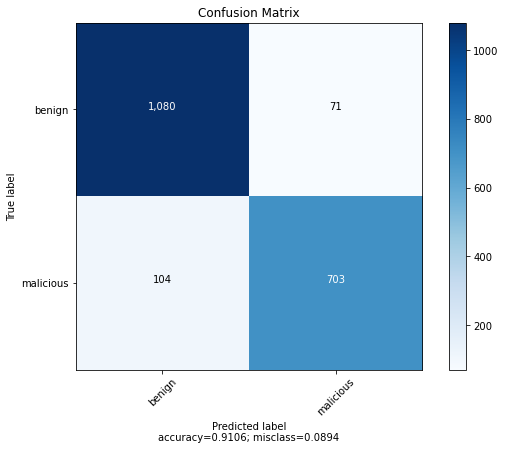

In [21]:
plot_confusion_matrix(cm, normalize = False, target_names = ['benign', 'malicious'], title = "Confusion Matrix")

In [22]:
pred=rdF.predict(oldAdv_X_test)
cm=confusion_matrix(oldAdv_Y_test, pred)
print(cm)
print(classification_report(oldAdv_Y_test,pred, labels=None))

[[  0   0]
 [  1 124]]
              precision    recall  f1-score   support

      benign       0.00      0.00      0.00         0
   malicious       1.00      0.99      1.00       125

    accuracy                           0.99       125
   macro avg       0.50      0.50      0.50       125
weighted avg       1.00      0.99      1.00       125



C:\Users\janus\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janus\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janus\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


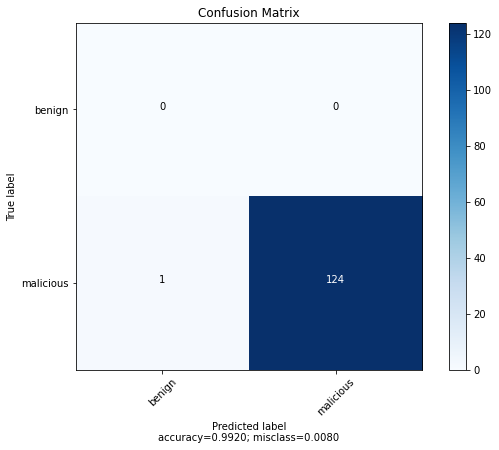

In [23]:
plot_confusion_matrix(cm, normalize = False, target_names = ['benign', 'malicious'], title = "Confusion Matrix")

In [24]:
pred=rdF.predict(adv_X_test)
cm=confusion_matrix(adv_Y_test, pred)
print(cm)
print(classification_report(adv_Y_test,pred, labels=None))

[[125]]
              precision    recall  f1-score   support

   malicious       1.00      1.00      1.00       125

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



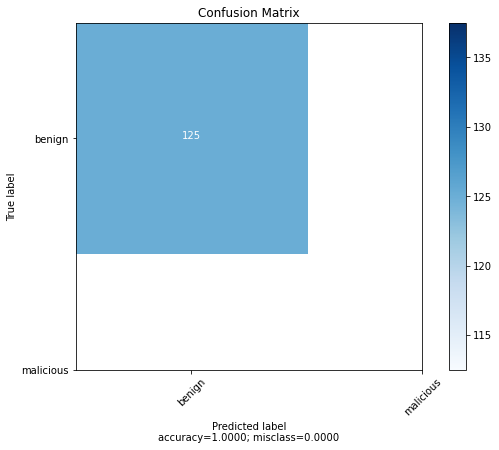

In [25]:
plot_confusion_matrix(cm, normalize = False, target_names = ['benign', 'malicious'], title = "Confusion Matrix")

In [26]:
model=jb.load('rfDefense2021.sav')

In [27]:
pred=model.predict(golden_X_test)
cm=confusion_matrix(golden_Y_test, pred)

accuracy = accuracy_score(golden_Y_test,pred)
print(rdF)
print(accuracy)
print(classification_report(golden_Y_test,pred, labels=None))

print(cm)

RandomForestClassifier(max_depth=50, n_estimators=250, random_state=45)
0.9693564862104188
              precision    recall  f1-score   support

      benign       0.97      0.98      0.97      1151
   malicious       0.97      0.96      0.96       807

    accuracy                           0.97      1958
   macro avg       0.97      0.97      0.97      1958
weighted avg       0.97      0.97      0.97      1958

[[1123   28]
 [  32  775]]


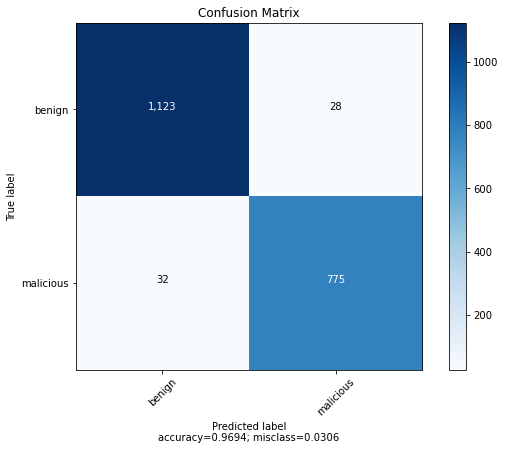

In [28]:
plot_confusion_matrix(cm, normalize = False, target_names = ['benign', 'malicious'], title = "Confusion Matrix")